In [1]:
def corrWind(u_r,z_r,z,alpha):
    '''
    u_r = new height (m)
    z_r = reference height (m)
    z = windspeed at reference height (m/s)
    alpha = coefficient, usually 0.143
    
    returns wind speed, u, at height u_r given windspeed z at height z_r 
    from: https://en.wikipedia.org/wiki/Wind_profile_power_law
    '''
    u = u_r*((z/z_r)**alpha)
    
    return u

In [2]:
dat = pd.read_csv('./data/nwt_hrly_met_data_20160527/data/c1_hrly_met_data_master_QC_infill.csv')
dat.index = pd.DatetimeIndex(dat.datetime)

In [3]:
out = pd.DataFrame(columns=['Tmin','Tmax','Tave','P','rain_duration','wind'])

out.Tmin = dat.temp_FILL2.resample('D').min()
out.Tmax = dat.temp_FILL2.resample('D').max()
out.Tave = dat.temp_FILL2.resample('D').mean()
out.wind = dat.wind_FILL3.resample('D').mean() # this is at 5 m
out.P = dat.ppt_h.resample('D').sum()
out.rain_duration = (out.P*0.6890) + 1.0826 # from CRN hourly rain duration computation
out.P /= 1000. # mm > m

In [4]:
out.index.min()

Timestamp('1990-01-01 00:00:00', freq='D')

In [5]:
out.index.max()

Timestamp('2013-12-31 00:00:00', freq='D')

In [6]:
out.loc[out.P == 0.,'rain_duration'] = 0.
out.loc[out.rain_duration>24,'rain_duration'] = 24.

In [7]:
# correct the wind from 5 m to 10 m

out.wind2 = corrWind(10,5,out.wind,0.143)

In [13]:
out.to_pickle('./data/c1_met_jennings_QAQC.pcl')

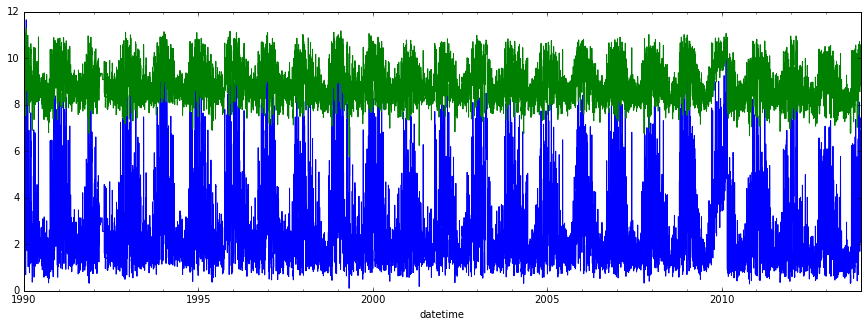

In [8]:
out.wind.plot(figsize=(15,5))
out.wind2.plot()

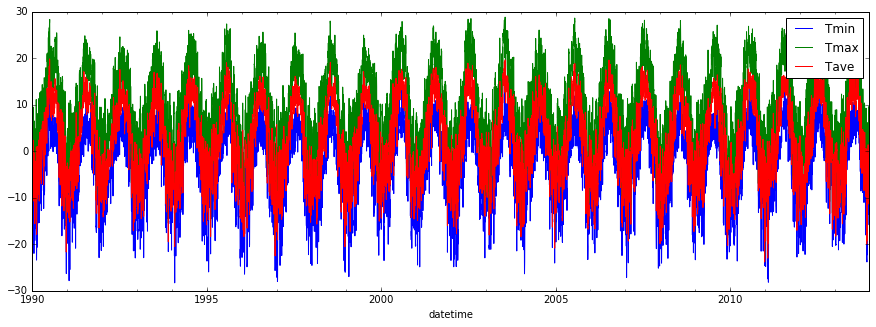

In [9]:
out.Tmin.plot(figsize=(15,5))
out.Tmax.plot()
out.Tave.plot()
plt.legend()

(13787, 15978)

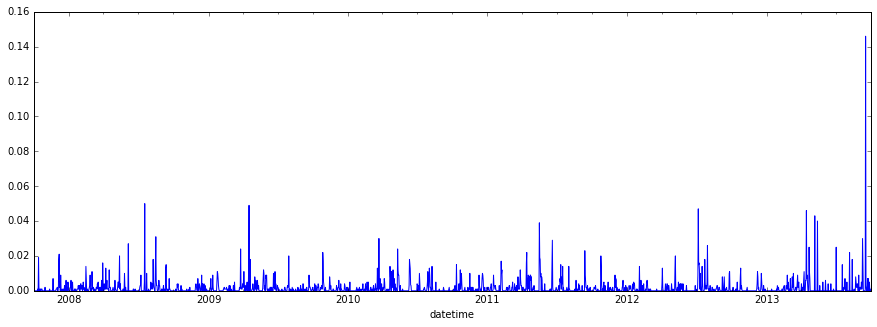

In [11]:
out.P.plot(kind='line',figsize=(15,5));
plt.xlim('2007-10-01','2013-09-30')

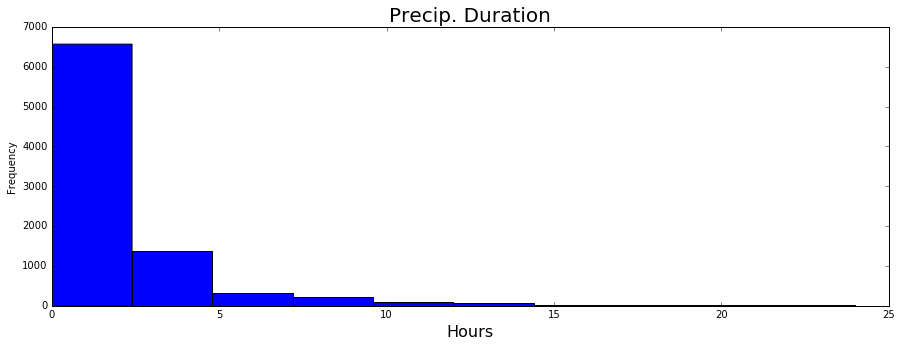

In [53]:
out.rain_duration.plot(kind='hist',figsize=(15,5))
plt.title('Precip. Duration',fontsize=20)
plt.xlabel('Hours', fontsize=16)

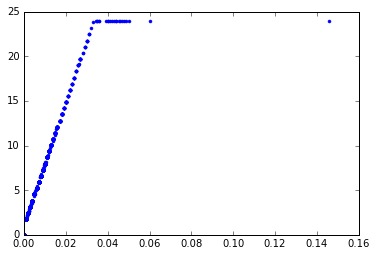

In [54]:
plt.plot(out.P,out.rain_duration,'.')